In [458]:
import requests
import json

from pandas_profiling import ProfileReport
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error

# 1. Problem description

# 2. Data collection

In [85]:
url = """
https://crudemonitor.ca/api/json.php?crudes%5B0%5D=Federated&crudes%5B1%5D=Light+Smiley&crudes%5B2%5D=Peace&crudes%5B3%5D=Pembina&crudes%5B4%5D=Secure+Sask+Light&crudes%5B5%5D=Mixed+Sweet+Blend&crudes%5B6%5D=Rainbow&crudes%5B7%5D=Hardisty+Light&crudes%5B8%5D=Medium+Gibson+Sour&crudes%5B9%5D=Midale&crudes%5B10%5D=Peace+Pipe+Sour&crudes%5B11%5D=BC+Light&crudes%5B12%5D=Boundary+Lake&crudes%5B13%5D=Koch+Alberta&crudes%5B14%5D=Moose+Jaw+Tops&crudes%5B15%5D=Pembina+Light+Sour&crudes%5B16%5D=Conventional+Heavy&crudes%5B17%5D=Hardisty+Synthetic+Crude&crudes%5B18%5D=Light+Sour+Blend&crudes%5B19%5D=Medium+Sour+Blend&crudes%5B20%5D=Mixed+Sweet+Blend+%28Superior%29&crudes%5B21%5D=Premium+Conventional+Heavy&crudes%5B22%5D=Premium+Synthetic&crudes%5B23%5D=Synbit+Blend&crudes%5B24%5D=Synthetic+Sweet+Blend&crudes%5B25%5D=CNRL+Light+Sweet+Synthetic&crudes%5B26%5D=Husky+Synthetic+Blend&crudes%5B27%5D=Long+Lake+Light+Synthetic&crudes%5B28%5D=Premium+Albian+Synthetic&crudes%5B29%5D=Shell+Synthetic+Light&crudes%5B30%5D=Suncor+Synthetic+A&crudes%5B31%5D=Syncrude+Sweet+Premium&crudes%5B32%5D=Bow+River+North&crudes%5B33%5D=Bow+River+South&crudes%5B34%5D=Fosterton&crudes%5B35%5D=Lloyd+Blend&crudes%5B36%5D=Lloyd+Kerrobert&crudes%5B37%5D=Seal+Heavy&crudes%5B38%5D=Smiley-Coleville&crudes%5B39%5D=Wabasca+Heavy&crudes%5B40%5D=Western+Canadian+Blend&crudes%5B41%5D=Access+Western+Blend&crudes%5B42%5D=Borealis+Heavy+Blend&crudes%5B43%5D=Canadian+Natural+High+TAN&crudes%5B44%5D=Christina+Dilbit+Blend&crudes%5B45%5D=Cold+Lake&crudes%5B46%5D=Fort+Hills+Dilbit&crudes%5B47%5D=Kearl+Lake&crudes%5B48%5D=Leismer+Corner+Blend&crudes%5B49%5D=Surmont+Heavy+Dilbit&crudes%5B50%5D=Western+Canada+Dilbit&crudes%5B51%5D=Western+Canadian+Select&crudes%5B52%5D=Long+Lake+Heavy&crudes%5B53%5D=PetroChina+Blend&crudes%5B54%5D=Statoil+Cheecham+Synbit&crudes%5B55%5D=Surmont+Heavy+Blend&crudes%5B56%5D=Surmont+Mix+A&crudes%5B57%5D=Albian+Heavy+Synthetic&crudes%5B58%5D=Suncor+Synthetic+H&crudeProperties%5B0%5D=crudes-BA&crudeProperties%5B1%5D=crudes-LE&crudeProperties%5B2%5D=crudes-HTSD&date%5Bstart%5D=2013-01-01&date%5Bend%5D=2023-01-01
"""

In [86]:
r = requests.get(url)
r_json = json.loads(r.text)
df1 = pd.DataFrame(r_json)
df1.Name.unique()

In [456]:
columns = ['Name', 'Batch', 'Sample Date (yyyy-mm-dd)', 'Location', 'Absolute Density (kg/m3)', 'Gravity (&degAPI)', 
 'Sulphur (wt%)', 'MCR (wt%)', 'Sediment (ppmw)', 'TAN (mgKOH/g)', 'Salt (ptb)', 'Nickel (mg/kg)', 'Vanadium (mg/kg)',
 'C1 Methane (vol%)', 'C2 Ethane (vol%)', 'C3 Propane (vol%)', 'iC4 iso-Butane (vol%)', 'nC4 n-Butane (vol%)',
 'iC5 iso-Pentane (vol%)', 'nC5 n-Pentane (vol%)', 'C6 Hexanes (vol%)', 'C7 Heptanes (vol%)', 'C8 Octanes (vol%)',
 'C9 Nonanes (vol%)', 'C10 Decanes (vol%)', 'IBP', '5% Recovered', '10% Recovered', '15% Recovered', '20% Recovered', 
 '25% Recovered', '30% Recovered', '35% Recovered', '40% Recovered', '45% Recovered', '50% Recovered', '55% Recovered',
 '60% Recovered', '65% Recovered', '70% Recovered', '75% Recovered', '80% Recovered', '85% Recovered', '90% Recovered',
 '95% Recovered', '99% Recovered']

In [457]:
df1 = df1[columns]

In [461]:
profile = ProfileReport(df1)
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 3. Data cleaning

In [432]:
df2=df1.copy()
# Convert sample data to datetime stamp
df2.loc[:,"Sample Date (yyyy-mm-dd)"] = pd.to_datetime(df2["Sample Date (yyyy-mm-dd)"])
# Sort based on datetime
df2 = df2.sort_values("Sample Date (yyyy-mm-dd)", ascending=False)
# Group by crude name and fill the missing data based on previous latest avilable data
df3 = df2.groupby('Name').fillna(method='bfill', axis=0)
df3['Name'] = df2['Name']

In [438]:
# Get feature tables
df_feature = df3[df3.columns[3:-101]]
# Drop 'C1 Methane (vol%)' because all of the values are ND
df_feature = df_feature.drop(columns=['C1 Methane (vol%)'])
# Fill missing value with 0
df_feature = df_feature.fillna(0)
# Replace ND with 0 and convert columns into numerical features.
df_feature = df_feature.applymap(lambda x: 0 if x == "ND" else float(x))

In [439]:
df_latest = df_feature.copy()
df_latest['Name'] = df3['Name']
# Keep the most recent crude profile 
df_latest = df_latest.drop_duplicates(['Name'],keep='first')

In [435]:
len(df_latest['Name'].unique())

61

In [440]:
df_latest['Name'].unique()

array(['Pembina', 'Fort Hills Dilbit', 'Christina Dilbit Blend',
       'Lloyd Kerrobert', 'Western Canadian Select',
       'Albian Heavy Synthetic', 'Western Canada Dilbit',
       'CNRL Light Sweet Synthetic', 'Suncor Synthetic A',
       'Medium Gibson Sour', 'Access Western Blend', 'PetroChina Blend',
       'Surmont Heavy Dilbit', 'Kearl Lake', 'Mixed Sweet Blend',
       'Bow River North', 'Syncrude Sweet Premium', 'Wabasca Heavy',
       'Fosterton', 'Rainbow', 'Premium Albian Synthetic', 'Peace',
       'Light Smiley', 'Canadian Natural High TAN', 'Secure Sask Light',
       'Lloyd Blend', 'Cold Lake', 'Smiley-Coleville', 'Seal Heavy',
       'Midale', 'Premium Conventional Heavy', 'Synthetic Sweet Blend',
       'Hardisty Synthetic Crude', 'Medium Sour Blend',
       'Conventional Heavy', 'Light Sour Blend', 'Premium Synthetic',
       'Moose Jaw Tops', 'Mixed Sweet Blend (Superior)',
       'Suncor Synthetic H', 'Surmont Mix A', 'Borealis Heavy Blend',
       'Federated', 'H

In [436]:
# Save the 61 Crude profiles as a csv for prediction usage.
df_latest.to_csv('crude_profile.csv',index=False)

In [383]:
df_feature.columns

Index(['Absolute Density (kg/m3)', 'Gravity (&degAPI)', 'Sulphur (wt%)',
       'MCR (wt%)', 'Sediment (ppmw)', 'TAN (mgKOH/g)', 'Salt (ptb)',
       'Nickel (mg/kg)', 'Vanadium (mg/kg)', 'C1 Methane (vol%)',
       'C2 Ethane (vol%)', 'C3 Propane (vol%)', 'iC4 iso-Butane (vol%)',
       'nC4 n-Butane (vol%)', 'iC5 iso-Pentane (vol%)', 'nC5 n-Pentane (vol%)',
       'C6 Hexanes (vol%)', 'C7 Heptanes (vol%)', 'C8 Octanes (vol%)',
       'C9 Nonanes (vol%)', 'C10 Decanes (vol%)'],
      dtype='object')

In [389]:
df_feature.describe()

,Absolute Density (kg/m3),Gravity (&degAPI),Sulphur (wt%),MCR (wt%),Sediment (ppmw),TAN (mgKOH/g),Salt (ptb),Nickel (mg/kg),Vanadium (mg/kg),C2 Ethane (vol%),C3 Propane (vol%),iC4 iso-Butane (vol%),nC4 n-Butane (vol%),iC5 iso-Pentane (vol%),nC5 n-Pentane (vol%),C6 Hexanes (vol%),C7 Heptanes (vol%),C8 Octanes (vol%),C9 Nonanes (vol%),C10 Decanes (vol%)
count,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000
mean,889.261467,27.869174,2.157935,5.858931,138.007665,0.737069,9.049178,29.585882,72.750863,0.012404,0.170092,0.617273,1.694472,2.041825,2.347739,4.353533,4.012865,3.837795,3.057799,1.601730
std,43.268175,7.911760,1.508338,4.222856,168.860747,0.817345,15.496756,24.866086,63.413769,0.017958,0.177253,0.473915,1.005567,1.270060,1.239703,1.636913,1.933609,2.039063,1.740036,0.903121
min,790.700000,18.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.030000,0.430000,0.850000,0.900000,0.300000,0.000000
25%,851.200000,20.900000,0.410000,1.700000,0.000000,0.000000,0.000000,3.800000,7.000000,0.000000,0.050000,0.230000,0.880000,1.080000,1.470000,3.200000,2.680000,2.260000,1.620000,0.820000
50%,917.500000,22.600000,2.690000,7.100000,98.000000,0.585000,4.300000,29.000000,76.000000,0.000000,0.090000,0.490000,1.490000,1.750000,2.120000,4.330000,3.350000,3.060000,2.560000,1.370000
75%,927.900000,34.600000,3.530000,9.700000,218.000000,1.140000,11.200000,52.600000,131.000000,0.020000,0.280000,0.930000,2.470000,2.670000,2.990000,5.540000,5.430000,5.430000,4.400000,2.350000
max,942.200000,47.300000,5.310000,15.300000,1508.100000,4.030000,191.000000,84.800000,219.000000,0.090000,1.020000,2.770000,6.120000,11.040000,10.780000,13.970000,13.300000,12.280000,9.790000,5.550000


In [394]:
# Get dependent variables(Y)

df_label = df3.iloc[:,-101:-1]

In [148]:
df_label.columns

Index(['IBP', '1% Recovered', '2% Recovered', '3% Recovered', '4% Recovered',
       '5% Recovered', '6% Recovered', '7% Recovered', '8% Recovered',
       '9% Recovered', '10% Recovered', '11% Recovered', '12% Recovered',
       '13% Recovered', '14% Recovered', '15% Recovered', '16% Recovered',
       '17% Recovered', '18% Recovered', '19% Recovered', '20% Recovered',
       '21% Recovered', '22% Recovered', '23% Recovered', '24% Recovered',
       '25% Recovered', '26% Recovered', '27% Recovered', '28% Recovered',
       '29% Recovered', '30% Recovered', '31% Recovered', '32% Recovered',
       '33% Recovered', '34% Recovered', '35% Recovered', '36% Recovered',
       '37% Recovered', '38% Recovered', '39% Recovered', '40% Recovered',
       '41% Recovered', '42% Recovered', '43% Recovered', '44% Recovered',
       '45% Recovered', '46% Recovered', '47% Recovered', '48% Recovered',
       '49% Recovered', '50% Recovered', '51% Recovered', '52% Recovered',
       '53% Recovered', '54

In [395]:
df_label.describe()

,IBP,1% Recovered,2% Recovered,3% Recovered,4% Recovered,5% Recovered,6% Recovered,7% Recovered,8% Recovered,9% Recovered,...,90% Recovered,91% Recovered,92% Recovered,93% Recovered,94% Recovered,95% Recovered,96% Recovered,97% Recovered,98% Recovered,99% Recovered
count,4819,4819,4819,4819,4819,4819,4819,4819,4819,4819,...,3192,2926,2690,2636,2453,2295,2264,2176,2033,1510
unique,143,224,453,558,672,788,894,967,1020,1019,...,880,879,816,755,694,621,537,480,452,445
top,-11.7,-0.5,27.8,36.1,36.1,36.1,36.1,60.3,68.7,68.7,...,711.7,692.9,704.2,716.1,719.8,719.0,696.7,713.2,706.4,695.1
freq,272,347,207,214,176,234,138,72,74,89,...,91,114,111,117,85,83,87,87,98,100


In [149]:
# Start from IBP 
df_IBP = df_feature.copy()
df_IBP['%mass'] = 0
df_IBP['temp'] = df_label['IBP']

In [152]:
# To create a distillation profile, we need %recoered from 5% to 99% at 5 percentage point intervals, as well as iBP.
mass_list = list(range(5,100,5))
mass_list.append(99)
for i in mass_list:
    df_next = df_feature.copy()
    
    # Make %mass as a feature 
    df_next['%mass'] = i
    
    # Get dependent varaible 
    column_name = str(i)+"% Recovered" 
    df_next['temp'] = df_label[column_name]
    
    # Append the table 
    df_IBP = pd.concat([df_IBP,df_next])

In [167]:
# Drop the row if the tempature is null, since it means the % mass cannot be reached with this profile,
# or the distillation profile is not tested/stimulated in this profile. 
df_IBP = df_IBP.dropna(subset=["temp"])
df_IBP = df_IBP.drop(columns=['C1 Methane (vol%)'])
df_IBP = df_IBP.fillna(0)
df_IBP = df_IBP.applymap(lambda x: 0 if x == "ND" else float(x))

print("Data is ready for modelling")

In [413]:
len(df_IBP)

93402

In [411]:
df_IBP.head(5)

,Absolute Density (kg/m3),Gravity (&degAPI),Sulphur (wt%),MCR (wt%),Sediment (ppmw),TAN (mgKOH/g),Salt (ptb),Nickel (mg/kg),Vanadium (mg/kg),C2 Ethane (vol%),...,nC4 n-Butane (vol%),iC5 iso-Pentane (vol%),nC5 n-Pentane (vol%),C6 Hexanes (vol%),C7 Heptanes (vol%),C8 Octanes (vol%),C9 Nonanes (vol%),C10 Decanes (vol%),%mass,temp
4864,825.1,39.9,0.41,1.9,0.0,0.00,0.0,4.5,9.6,0.02,...,2.62,1.40,1.82,5.85,7.18,7.00,6.29,3.58,0.0,34.1
4862,923.8,21.5,3.96,9.1,39.7,2.00,3.6,53.7,141.0,0.00,...,0.96,4.29,4.73,5.65,3.48,2.39,1.33,0.68,0.0,34.2
4861,919.1,22.3,3.83,10.1,94.7,1.43,3.2,66.1,166.0,0.03,...,1.30,4.53,4.95,6.04,3.74,2.62,1.54,0.81,0.0,34.6
4858,922.2,21.8,3.35,9.7,187.1,0.99,24.0,43.9,107.0,0.03,...,1.83,2.45,2.66,4.00,3.22,2.68,1.84,0.91,0.0,34.2
4860,925.1,21.3,3.81,9.9,137.0,0.91,11.2,53.4,133.0,0.03,...,1.95,2.36,2.64,4.04,3.19,2.67,1.91,1.06,0.0,34.4


<AxesSubplot:>

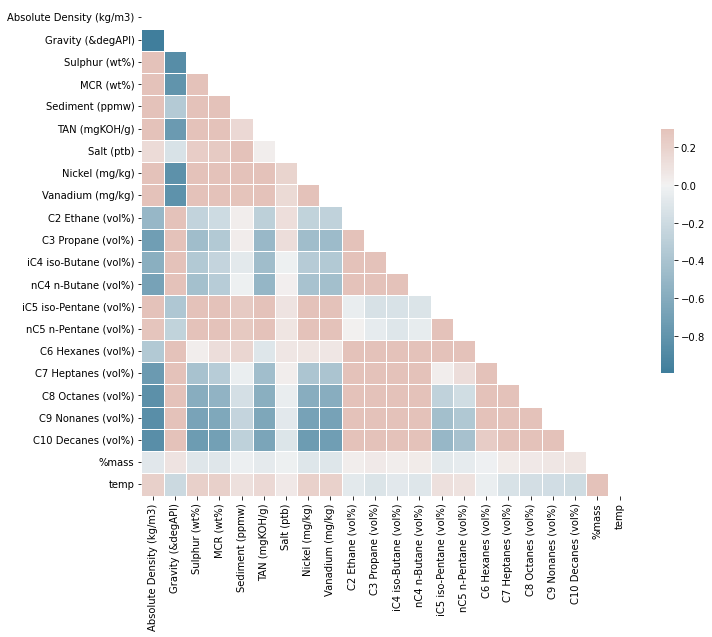

In [182]:
# Compute the correlation matrix
corr = df_IBP.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# 4. Modelling

In [186]:
df_x = df_IBP.iloc[:,:-1]
Y = df_IBP.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(df_x, Y, test_size =0.3, random_state=0)

## 4.1 Linear regression

In [202]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x_train, y_train)  # perform linear regression
y_pred = linear_regressor.predict(x_test)  # make predictions

In [191]:
print(linear_regressor.intercept_)
print(linear_regressor.coef_)

-1989.9764465412013
[ 2.00605517e+00  7.99133127e+00  4.99901042e+00  8.68100957e+00
 -1.79481680e-02  1.87558687e+00  9.00254632e-02 -4.68510793e-01
  9.68043259e-02  6.30392211e+01  1.69056686e+01  1.49733057e+01
 -2.77810174e+00  8.57065231e+00 -6.53540253e+00 -1.15620214e+00
 -4.10723250e+00  3.23343277e+00 -1.08499230e+00 -3.98620167e+00
  6.46266052e+00]


In [216]:
pd.DataFrame([x_train.columns,linear_regressor.coef_]).T

,0,1
0,Absolute Density (kg/m3),2.006055
1,Gravity (&degAPI),7.991331
2,Sulphur (wt%),4.99901
3,MCR (wt%),8.68101
4,Sediment (ppmw),-0.017948
5,TAN (mgKOH/g),1.875587
6,Salt (ptb),0.090025
7,Nickel (mg/kg),-0.468511
8,Vanadium (mg/kg),0.096804
9,C2 Ethane (vol%),63.039221


In [234]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred)**0.5)
print(r2_score(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))


41.3774694453268
53.872172742169575
0.9234746499382088
0.5989318844387825


In [450]:
# start from model selection of rondom forest regressor(hyper parameter tuning)
parameters = {'alpha':[0,0.001,0.01,0.1,1,10], 'tol':[1e-7,1e-6,1e-5,1e-4,1e-3], 'max_iter':[10000,20000]}
lr = GridSearchCV(estimator = Ridge(), param_grid = parameters,
                     scoring ='neg_mean_squared_error', n_jobs = -1)
lr.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0, 0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [10000, 20000],
                         'tol': [1e-07, 1e-06, 1e-05, 0.0001, 0.001]},
             scoring='neg_mean_squared_error')

In [452]:
lr.best_score_

-2975.9393712965075

In [453]:
print("Found the best parameters for the random forest model:",lr.best_params_)

Found the best parameters for the random forest model: {'alpha': 1, 'max_iter': 10000, 'tol': 1e-07}


In [279]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred)**0.5)
print(r2_score(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))


42.858960339484604
55.337023195093984
0.9192564336827973
0.580628679543454


## 4.2 Random Forest 

In [380]:
# start from model selection of rondom forest regressor(hyper parameter tuning)
parameters = {'n_estimators':[50,100,150,200], 'max_depth':[4,6,8,10,12]}
rg = GridSearchCV(estimator = RandomForestRegressor(), param_grid = parameters,
                     scoring ='neg_mean_squared_error', n_jobs = -1)
rg.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10, 12],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_squared_error')

In [351]:
rg.best_score_

-251.57330213266397

In [416]:
print("Found the best parameters for the random forest model:",rg.best_params_)

find the best parameters for the random forest model: {'max_depth': 12, 'n_estimators': 200}


In [423]:
# train the model 
rg1 = RandomForestRegressor(n_estimators=200, max_depth=12)
rg1.fit(x_train,y_train)
y_pred = rg1.predict(x_test)  # make predictions

In [424]:
# model evaluatation
y_pred = rg1.predict(x_train)  # make predictions
print(mean_absolute_error(y_train, y_pred))
print(mean_squared_error(y_train, y_pred)**0.5)
print(r2_score(y_train, y_pred))
# print(mean_absolute_percentage_error(y_train,y_pred))

8.859286965703596
12.428673270443449
0.9959629389440229


In [425]:
y_pred = rg1.predict(x_test) 
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred)**0.5)
print(r2_score(y_test, y_pred))
# print(mean_absolute_percentage_error(y_test, y_pred))

11.004878737436725
16.138275060676385
0.9931326280807293


# Save model

In [430]:
joblib.dump(rg1, "./random_forest.joblib", compress=3)


['./random_forest.joblib']

<AxesSubplot:>

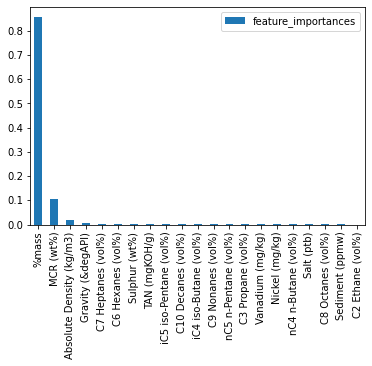

In [466]:
df_feature_importance = pd.DataFrame(rg1.feature_importances_,feature_names)
df_feature_importance.columns = ['feature_importances']
df_feature_importance.sort_values(by='feature_importances',ascending= False).plot(kind='bar')

In [309]:
np.array(y_pred)

array([325.33649536, 668.39705122, 276.56906785, ..., 255.04390089,
       422.08809282, 416.70489688])

In [316]:
[np.array(),np.array()]

[array([320. , 663.8, 273.9, ..., 209.3, 417. , 405.2]),
 array([325.33649536, 668.39705122, 276.56906785, ..., 255.04390089,
        422.08809282, 416.70489688])]

In [324]:
np.array([np.array(y_train),y_pred]).reshape(2,-1).shape

(2, 65381)

In [331]:
df_eva = pd.DataFrame(np.array([np.array(y_train),y_pred])).T
df_eva.columns = ['y_pred','y_train']
df_eva['diff'] = df_eva.apply(lambda x: (x['y_train']-x['y_pred'])/x['y_train'], axis=1)

In [338]:
df_eva.describe()

,y_pred,y_train,diff
count,65381.000000,65381.000000,65381.000000
mean,357.527380,357.542143,-0.011460
std,195.611973,194.772693,3.999068
min,-11.700000,-11.700000,-955.823528
25%,207.100000,207.456321,-0.025488
50%,354.600000,354.565819,-0.002112
75%,498.700000,497.771475,0.024303
max,720.000000,717.553670,277.934628


In [339]:
df_eva[df_eva['diff']<-10]

,y_pred,y_train,diff
2882,-11.7,-0.076804,-151.335298
11100,-11.7,-0.012228,-955.823528
16998,-11.7,-0.671378,-16.426838
22246,-11.7,-0.668160,-16.510781
24892,-11.7,-0.830873,-13.081572
36589,-11.7,-0.830873,-13.081572
40975,-11.7,-0.230108,-49.845693
47808,-11.7,-0.145140,-79.611941
49525,34.3,0.516037,-65.468131
51640,-11.7,-0.211515,-54.315351


In [298]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred)**0.5)
print(r2_score(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))

11.768514711161139
16.95434152670517
0.992420541205173
0.13356269171242685


In [290]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred)**0.5)
print(r2_score(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))


11.778076448193936
16.9708844091413
0.9924057429581109
0.1298841245290165
